## Language Models
Outline:
* from the rule-based approach to probability-based models
* 1-gram and 2-gram models
* using regular expressions

In [2]:
import os
import pandas as pd
import re

In [20]:
file_path = "/Users/xinweixu/Dropbox/learn/Comp_Prog/nlp/data/sqlResult_1558435.csv"
os.path.exists(file_path) # check if the file path exists in local directory

True

In [21]:
dataframe =  pd.read_csv(file_path, encoding='gb18030')

# simplified chinese uses encoding 'gb18030'!

In [22]:
dataframe

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...
5,89612,张怡,中国证券报?中证网,受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",金融股一枝独秀 配置价值犹存,http://www.cs.com.cn/gppd/201706/t20170623_533...
6,89611,NaN,威锋网@http://www.feng.com/,虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""21""...",配骁龙660 全面屏鼻祖夏普新机酝酿中,http://www.cnbeta.com/articles/tech/623603.htm
7,89610,申玉彬 整理,中国证券报?中证网,沙漠雄鹰：震荡有利消化套牢筹码\r\n 周四开盘上证50在银行券商大蓝筹带动下一度涨近...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",博友早评：震荡有利消化套牢筹码,http://www.cs.com.cn/gppd/201706/t20170623_533...
8,89609,李杭_BJS4645,荆楚网-楚天都市报,（原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""1600""...",武汉千余警察出动 抓获808名俊男靓女全是诈骗犯,http://news.163.com/17/0614/14/CMT9N8G80001899...
9,89608,吴瞬,中国证券报?中证网,6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",纳入MSCI指数 A股长期配置价值提升,http://www.cs.com.cn/gppd/201706/t20170623_533...


In [23]:
all_articles = dataframe['content'].tolist()

In [27]:
all_articles[:10]

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n',
 '此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n至于电池缩水，可能与刘作虎所说，一加手机5要做市面最轻薄大屏旗舰的设定有关。\r\n按照目前掌握的资料，一加手机5拥有5.5寸1080P三星AMOLED显示屏、6G/8GB RAM，64GB/128GB ROM，双1600万摄像头，备货量“惊喜”。\r\n根据京东泄露的信息，一加5起售价是xx99元，应该是在2799/2899/2999中的某个。\r\n',
 '这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n',
 '（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说

In [37]:
def token(string):
    """Define a procedure to isolate all words in the text, so as to 
    -- remove irrelevant strings '\r'and '\n';
    -- remove all punctuation marks
    """
    return ' '.join(re.findall('[\w|\d]+', string))

In [38]:
# a test case
temp_string = '***&& %%## this is a BIGGGGGGGGG thing BI and BIGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGgg'
token(temp_string)

'this is a BIGGGGGGGGG thing BI and BIGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGgg'

In [39]:
all_articles = [token(str(a)) for a in all_articles]
all_articles[:10]

['此外 自本周 6月12日 起 除小米手机6等15款机型外 其余机型已暂停更新发布 含开发版 体验版内测 稳定版暂不受影响 以确保工程师可以集中全部精力进行系统优化工作 有人猜测这也是将精力主要用到MIUI 9的研发之中 MIUI 8去年5月发布 距今已有一年有余 也是时候更新换代了 当然 关于MIUI 9的确切信息 我们还是等待官方消息',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器 高通强调 不会因为只考虑性能而去屏蔽掉小核心 相反 他们正联手微软 找到一种适合桌面平台的 兼顾性能和功耗的完美方案 报道称 微软已经拿到了一些新的源码 以便Windows 10更好地理解big little架构 资料显示 骁龙835作为一款集成了CPU GPU 基带 蓝牙 Wi Fi的SoC 比传统的Wintel方案可以节省至少30 的PCB空间 按计划 今年Q4 华硕 惠普 联想将首发骁龙835 Win10电脑 预计均是二合一形态的产品 当然 高通骁龙只是个开始 未来也许还能见到三星Exynos 联发科 华为麒麟 小米澎湃等进入Windows 10桌面平台',
 '此前的一加3T搭载的是3400mAh电池 DashCharge快充规格为5V 4A 至于电池缩水 可能与刘作虎所说 一加手机5要做市面最轻薄大屏旗舰的设定有关 按照目前掌握的资料 一加手机5拥有5 5寸1080P三星AMOLED显示屏 6G 8GB RAM 64GB 128GB ROM 双1600万摄像头 备货量 惊喜 根据京东泄露的信息 一加5起售价是xx99元 应该是在2799 2899 2999中的某个',
 '这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车 新华社记者张立云摄',
 '原标题 44岁女子跑深圳约会网友被拒 暴雨中裸身奔走 深圳交警微博称 昨日清晨交警发现有一女子赤裸上身 行走在南坪快速上 期间还起了轻生年头 一辅警发现后赶紧为其披上黄衣 并一路劝说她 那么事发时 到底都发生了些什么呢 南都记者带您一起还原现场 南都记者在龙岗大队坂田中队见到了辅警刘青 发现女生的辅警 一位外表高大帅气 说话略带些腼腆的90后青年 刘青介绍 6月16日早上7时36分 他正在环城南路附近值勤 接到中队关于一位女子裸身进入机动车可能有危险的警情 随后骑着小铁骑开始沿路

In [30]:
text = ''

for a in all_articles:
    text += a
print('length of text: {}'.format(len(text)))

# get number of words in the text

length of text: 37412506


In [32]:
TEXT = text

In [40]:
from functools import reduce
txt_from_reduce = reduce(lambda a1, a2: a1 + a2, all_articles[:10])

# A note for 'reduce': 
# -- apply function of two arguments cumulatively to the items of sequence 
# from left to right, so as to reduce the sequence to a single value. 
# For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) 
# calculates ((((1+2)+3)+4)+5)

### using regular expressions

In [43]:
pattern = '\w+'

In [45]:
re.findall(pattern, temp_string)

['this',
 'is',
 'a',
 'BIGGGGGGGGG',
 'thing',
 'BI',
 'and',
 'BIGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGgg']

In [42]:
url = 'https://movie.douban.com/'

In [10]:
import requests
response = requests.get(url)
html_content = response.text

In [5]:
url_pattern = re.compile('https://movie.douban.com/subject/\w+/\?from=showing')

# in regular expressions, ? = 0 or 1; here add "\" in front of "?"

In [46]:
url_pattern.findall(html_content)

# this finds all urls for the movie titles shown on movie.douban.com
# note:
# to look up for the url of an entity on a webpage in chrome,
# right click and select "inspect"

['https://movie.douban.com/subject/2244426/?from=showing',
 'https://movie.douban.com/subject/2244426/?from=showing',
 'https://movie.douban.com/subject/27202819/?from=showing',
 'https://movie.douban.com/subject/27202819/?from=showing',
 'https://movie.douban.com/subject/30334073/?from=showing',
 'https://movie.douban.com/subject/30334073/?from=showing',
 'https://movie.douban.com/subject/27663742/?from=showing',
 'https://movie.douban.com/subject/27663742/?from=showing',
 'https://movie.douban.com/subject/26728669/?from=showing',
 'https://movie.douban.com/subject/26728669/?from=showing',
 'https://movie.douban.com/subject/25924056/?from=showing',
 'https://movie.douban.com/subject/25924056/?from=showing',
 'https://movie.douban.com/subject/30164448/?from=showing',
 'https://movie.douban.com/subject/30164448/?from=showing',
 'https://movie.douban.com/subject/5300054/?from=showing',
 'https://movie.douban.com/subject/5300054/?from=showing',
 'https://movie.douban.com/subject/30288751/

In [47]:
# we can also grab the images by defining an image pattern:

image_pattern = re.compile('https://img3.doubanio.com/view/photo/s_ratio_poster/public/\w\d+.\w+')

In [50]:
set(image_pattern.findall(html_content))

{'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2510130772.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2521648155.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2529571873.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2541035591.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2541240741.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2544987866.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2545472803.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2546335362.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2548549246.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2548870813.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549177902.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549234765.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poste

In [ ]:
# a helper procedure for debugging the url_pattern defined:

for line in html_content.split():
    match = url_pattern.findall(line)
    if match:
        print(match[0])

### get all tokens

In [51]:
import jieba

In [52]:
def cut(string): return list(jieba.cut(string))

In [53]:
cut('这是一个测试')

['这是', '一个', '测试']

In [54]:
ALL_TOKENS = cut(TEXT)

In [56]:
valid_tokens = [t for t in ALL_TOKENS if t.strip() and t != 'n']

# strip all the whitespaces and 'n's

In [55]:
len(ALL_TOKENS)

21906852

In [58]:
len(valid_tokens)

17221785

In [59]:
valid_tokens[:10]

['此外', '自', '本周', '6', '月', '12', '日', '起', '除', '小米']

### get word frequences & 1-gram model
Here we use the 1-gram model as a simple solution for approximating the probability of the occurrence for a given sentence. By conditional probability, we have:
$$Pr(sentence)= Pr(word_1)\cdot Pr(word_2|word_1) \cdot Pr(word_3 | word_2, word_1) ... Pr(word_n | word_{n-1},... word_1)$$
If we assume the occurrences of each word, $word_i$ are independent events, then we have:
$$Pr(sentence) \approx Pr(word_1)\cdot Pr(word_2) ... Pr(word_n) = \Pi_{i=1}^n Pr(w_i)$$

In [60]:
from collections import Counter
Counter([1,1,1,2,2,2,2,2]) 
# a function for counting the frequences of distinct elements in a list

Counter({1: 3, 2: 5})

In [78]:
words_count = Counter(valid_tokens)

In [63]:
words_count.most_common(10)
# check out the 10 most commonly seen words

# note:
# the frequency distribution typically has a long-tail shape
# for example, if the most common word has frequency of n
# the second most common word typically has n/2
# the third most common one n/3, ... and so on

[('的', 703820),
 ('在', 264633),
 ('月', 189525),
 ('日', 169920),
 ('新华社', 142462),
 ('和', 134220),
 ('年', 123531),
 ('了', 121904),
 ('是', 100288),
 ('１', 88187)]

In [66]:
# now we want to plot the frequency distribution to verify 
# if it has a long-tail shape

frequences = [f for w, f in words_count.most_common(100)]
# get the frequences for the 100 most common words

x = [i for i in range(len(frequences))]

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

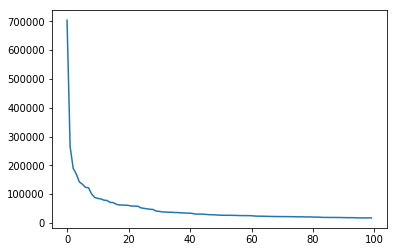

In [68]:
plt.plot(x, frequences)

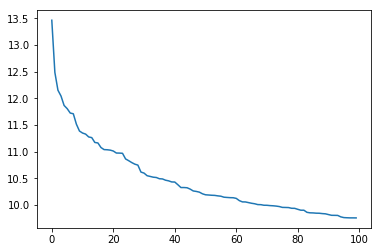

In [69]:
# log-transform the y-axis to get a better curve

import numpy as np
plt.plot(x, np.log(frequences))

In [70]:
frequences_all = [f for w, f in words_count.most_common()]
frequences_sum = sum(frequences_all)
frequences_sum

17221785

In [72]:
1/frequences_sum 

5.8065990255946174e-08

In [73]:
# now we define a procedure to calculate the probability for a give word
def get_prob(word):
    eps = 1 / frequences_sum # define a small constant, epsilon
    if word in words_count:
        return words_count[word] / frequences_sum
    else:
        return eps 
    
# note:
# if the word is not shown in the text, return epsilon
# to avoid zeros in calculating the probability of a given sentence
# in the prodecure defined below

In [74]:
get_prob('我们')

0.0011602746172943166

In [76]:
# define a procedure to calculate the probability of a given sentence
# using the simplified 1-gram model

def product(numbers):
    return reduce(lambda n1, n2: n1 * n2, numbers)

def sentence_prob_one_gram(string):
    words = cut(string)
    return product([get_prob(w) for w in words])


In [79]:
sentence_prob_one_gram('广交会下周举办')

7.422463278871643e-14

In [81]:
sentence_prob_one_gram('长征火箭下周发射')

1.4511549339176565e-18

In [82]:
sentence_prob_one_gram('一颗卫星掉在了民房上')

3.889770599486776e-25

In [83]:
sentences = """
这是一个比较正常的句子
这个一个比较罕见的句子
小明毕业于清华大学
小明毕业于秦华大学
""".split()

In [85]:
for s in sentences:
    print(s, sentence_prob_one_gram(s))

这是一个比较正常的句子 7.429984647015532e-22
这个一个比较罕见的句子 1.7566783516469408e-22
小明毕业于清华大学 3.039960976514903e-18
小明毕业于秦华大学 5.813337476916057e-24


In [86]:
# now we want to write a procedure to find the sentence with 
# a higher probability of occurrence within a pair

need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "我去吃火锅，今晚 今晚我去吃火锅"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = sentence_prob_one_gram(s1), sentence_prob_one_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 6.279484454158278e-50
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 5.1533768284792506e-48
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 2.873219522813593e-25
---- 真是一只好看的小猫 with probility 1.0935351206452033e-21
今晚我去吃火锅 is more possible
---- 我去吃火锅，今晚 with probility 6.876097222574346e-26
---- 今晚我去吃火锅 with probility 1.1841866800627252e-18


### 2-gram model

In a 2-gram model, instead of assuming the occurrences of words in a sentence are independent events, we assume that the occurrence of $word_n$ only depends on the occurrence of $word_n-1$, thus we have:
$$Pr(S)= $$